# 圧力

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets
%matplotlib inline


def generate_vbox_text_widget():
    """
    text widgetsをlink_num個作成 -> Vboxに格納して縦に並べる

    Returns
    -------
    vox_text_widgets : ipywidgets.widgets.widget_box.VBox
        text widgetsをnum個，縦に並べたVBox
    """
    text_widgets = []
    text_widgets.append(ipywidgets.FloatText(min=0.0, max=30.0))
    text_widgets.append(ipywidgets.FloatText(min=0.1, max=9.0))
    vox_text_widgets = ipywidgets.VBox(text_widgets)
    return vox_text_widgets

def generate_vbox_slider_widget():
    """
    slider widgetsをlink_num個作成 -> Vboxに格納して縦に並べる．

    Returns
    -------
    vox_slider_widgets : ipywidgets.widgets.widget_box.VBox
        slider widgetsをnum個，縦に並べたVBox
    """
    slider_widgets = []
    slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=0.0, max=30.0, description = "F", disabled=False))
    slider_widgets.append(ipywidgets.FloatSlider(value=5.0, min=0.1, max=9.0, description = "S", disabled=False))
    vox_slider_widgets = ipywidgets.VBox(slider_widgets)
    return vox_slider_widgets

def link_slider_and_text(box1, box2):
    """
    Box内の複数のwidetを連携させる（二つのbox内のwidgetの数が同じである必要あり）
    
    Parameters
    ----------
    box1 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    box2 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    """
    ipywidgets.link((box1.children[0], 'value'), (box2.children[0], 'value'))
    ipywidgets.link((box1.children[1], 'value'), (box2.children[1], 'value'))

def draw_interactive():
    """
    結果をアニメーションで表示
    """
    # slider widgetを作成
    posture_sliders = generate_vbox_slider_widget()
    # text widgetを作成
    posture_texts = generate_vbox_text_widget()

    # slider widget と　posture widget を横に並べる
    slider_and_text = ipywidgets.Box([posture_sliders, posture_texts])

    # slider wiget と text widget を連携
    link_slider_and_text(posture_sliders, posture_texts)

    # リセットボタン
    reset_button = ipywidgets.Button(description = "Reset")
    # 姿勢のリセットボタン
    def reset_values(button):
        posture_sliders.children[0].value = 0.0
        posture_sliders.children[1].value = 5.0
    reset_button.on_click(reset_values)

    # main文にslider widgetsの値を渡す
    params = {}
    params["F"] = posture_sliders.children[0]
    params["S"] = posture_sliders.children[1]
    final_widgets = ipywidgets.interactive_output(main, params)
    
    display(slider_and_text, reset_button, final_widgets)

In [2]:
def main(*args, **kwargs):
    params = kwargs

    # 本文 ----------------------------------------
    base_box_size = [10, 10] # ボックス（下）のサイズ（x, y）
    box_size = [params["S"], 9] # ボックス（上）のサイズ(x, y)
    F = params["F"] # 力[N]
    S = box_size[0] # 底面積[m^2]
    P = F/S # 圧力[Pa(=N/m^2)]
    # ----------------------------------------------

    # 以下，描画関連 -------------------------------------------------
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    mergin = 0.08 # 黒線と赤線が重ならないように
    ax.plot([0, 0], [0, base_box_size[1]], color = "black")
    ax.plot([base_box_size[0], base_box_size[0]], [0, base_box_size[1]], color = "black")
    # Pと同じ数値だけ凹むように描画
    if base_box_size[0] < box_size[0] or base_box_size[1] < box_size[1]: # box（上に乗せるボックス）の方が大きい場合は，描画しない
        print("None!")
    else:
        # base_box plot
        if base_box_size[1]-P-mergin < 0: # 圧力Pが強すぎた時は，base_boxを貫通するように描画
            print("box is ")
            ax.plot([0, base_box_size[0]/2-box_size[0]/2-mergin], [0, 0], color = "black") 
            ax.plot([base_box_size[0]/2+box_size[0]/2+mergin, base_box_size[0]], [0, 0], color = "black")
            ax.plot([base_box_size[0]/2-box_size[0]/2-mergin, base_box_size[0]/2-box_size[0]/2-mergin], [0, base_box_size[1]], color = "black")
            ax.plot([base_box_size[0]/2+box_size[0]/2+mergin, base_box_size[0]/2+box_size[0]/2+mergin], [0, base_box_size[1]], color = "black")
        else:
            ax.plot([0, base_box_size[0]], [0, 0], color = "black")
            ax.plot([base_box_size[0]/2-box_size[0]/2-mergin, base_box_size[0]/2-box_size[0]/2-mergin], [base_box_size[1], base_box_size[1]-P], color = "black")
            ax.plot([base_box_size[0]/2+box_size[0]/2+mergin, base_box_size[0]/2+box_size[0]/2+mergin], [base_box_size[1], base_box_size[1]-P], color = "black")
            ax.plot([base_box_size[0]/2-box_size[0]/2-mergin, base_box_size[0]/2+box_size[0]/2+mergin], [base_box_size[1]-P, base_box_size[1]-P], color = "black")
        ax.plot([0, base_box_size[0]/2-box_size[0]/2-mergin], [base_box_size[1], base_box_size[1]], color = "black")
        ax.plot([base_box_size[0]/2+box_size[0]/2+mergin, base_box_size[0]], [base_box_size[1], base_box_size[1]], color = "black")

        # box plot ---------------------
        ax.plot([base_box_size[0]/2-box_size[0]/2, base_box_size[0]/2+box_size[0]/2], [base_box_size[1]-P+mergin, base_box_size[1]-P+mergin], color = "red")
        ax.plot([base_box_size[0]/2-box_size[0]/2, base_box_size[0]/2+box_size[0]/2], [base_box_size[1]+box_size[1]-P+mergin, base_box_size[1]+box_size[1]-P+mergin], color = "red")
        ax.plot([base_box_size[0]/2-box_size[0]/2, base_box_size[0]/2-box_size[0]/2], [base_box_size[1]-P+mergin, base_box_size[1]+box_size[1]-P+mergin], color = "red")
        ax.plot([base_box_size[0]/2+box_size[0]/2, base_box_size[0]/2+box_size[0]/2], [base_box_size[1]-P+mergin, base_box_size[1]+box_size[1]-P+mergin], color = "red")
    
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 20)
    plt.show()

draw_interactive()




Box(children=(VBox(children=(FloatSlider(value=0.0, description='F', max=30.0), FloatSlider(value=5.0, descrip…

Button(description='Reset', style=ButtonStyle())

Output()

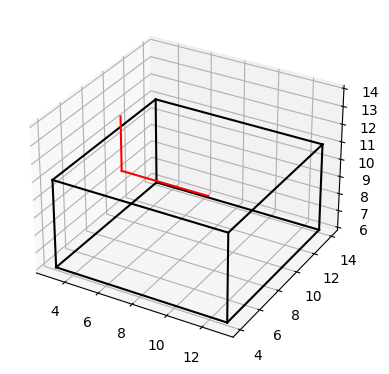

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets
%matplotlib inline

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1, projection='3d')

# base box plot ---------------------------------------------
origin = [3, 4, 6]
base_box_length = [10, 10, 5]
ax1.plot([origin[0],origin[0]], [origin[1], origin[1]], [origin[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 
ax1.plot([origin[0]+base_box_length[0], origin[0]+base_box_length[0]], [origin[1], origin[1]], [origin[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 
ax1.plot([origin[0], origin[0]], [origin[1]+base_box_length[1], origin[1]+base_box_length[1]], [origin[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 
ax1.plot([origin[0]+base_box_length[0], origin[0]+base_box_length[0]], [origin[1]+base_box_length[1], origin[1]+base_box_length[1]], [origin[2], origin[2]+base_box_length[2]], "-", color="black", ms=6)

ax1.plot([origin[0], origin[0]+base_box_length[0]], [origin[1], origin[1]], [origin[2], origin[2]], "-", color="black", ms=6) 
ax1.plot([origin[0], origin[0]+base_box_length[0]], [origin[1]+base_box_length[1], origin[1]+base_box_length[1]], [origin[2], origin[2]], "-", color="black", ms=6) 
ax1.plot([origin[0], origin[0]+base_box_length[0]], [origin[1], origin[1]], [origin[2]+base_box_length[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 
ax1.plot([origin[0], origin[0]+base_box_length[0]], [origin[1]+base_box_length[1], origin[1]+base_box_length[1]], [origin[2]+base_box_length[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 

ax1.plot([origin[0], origin[0]], [origin[1], origin[1]+base_box_length[1]], [origin[2], origin[2]], "-", color="black", ms=6) 
ax1.plot([origin[0]+base_box_length[0], origin[0]+base_box_length[0]], [origin[1], origin[1]+base_box_length[1]], [origin[2], origin[2]], "-", color="black", ms=6) 
ax1.plot([origin[0], origin[0]], [origin[1], origin[1]+base_box_length[1]], [origin[2]+base_box_length[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 
ax1.plot([origin[0]+base_box_length[0], origin[0]+base_box_length[0]], [origin[1], origin[1]+base_box_length[1]], [origin[2]+base_box_length[2], origin[2]+base_box_length[2]], "-", color="black", ms=6) 
# ---------------------------------------------

box_length = [5, 5, 3]
box_origin = [origin[0], origin[1], origin[2]+base_box_length[2]]
ax1.plot([box_origin[0]+box_length[0]/2, box_origin[0]+box_length[0]/2], [box_origin[1]+box_length[1]/2, box_origin[1]+box_length[1]/2], [box_origin[2], box_origin[2]+box_length[2]], "-", color="red", ms=6) 



ax1.plot([box_origin[0]+box_length[0]/2+box_length[0], box_origin[0]+box_length[0]/2], [box_origin[1]+box_length[1]/2, box_origin[1]+box_length[1]/2], [box_origin[2], box_origin[2]], "-", color="red", ms=6) 
